In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install yfinance
import numpy as np
import yfinance as yf 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 31.4 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 2.9 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.1-cp310-cp310-linux_x86_64.whl size=291653 sha256=50c415c2f877326090ffcfa63ce6e9bde46acb9ed8f6f9788eb7ca9d2554428b
  Stored in directory: /root/.cache/pip/wheels/d7/35/5c/1374782be033462df5f40174d8d879519d64ed8c25a1977554
Successfully built peewee


In [3]:
import numpy as np
import yfinance as yf 

In [4]:
import yfinance as yf

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import math
sns.set_style("whitegrid")

In [6]:
st = '2023-01-01'
ed = '2023-12-31'
benchmarkdf = yf.download(tickers = "^NSEMDCP50", start = st, end  = ed, progress = False, period = '1d')

In [7]:
benchmarkdf

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,8787.400391,8830.599609,8746.200195,8821.799805,8821.799805,0
2023-01-03,8834.250000,8868.099609,8809.400391,8843.349609,8843.349609,410200
2023-01-04,8849.549805,8863.950195,8713.500000,8745.700195,8745.700195,379400
2023-01-05,8778.349609,8818.000000,8722.950195,8808.599609,8808.599609,330400
2023-01-06,8817.700195,8827.049805,8717.099609,8752.299805,8752.299805,335700
...,...,...,...,...,...,...
2023-12-22,12836.799805,12881.099609,12744.950195,12838.200195,12838.200195,456800
2023-12-26,12877.200195,12950.349609,12827.549805,12905.599609,12905.599609,530300
2023-12-27,12961.900391,13016.900391,12874.250000,12946.500000,12946.500000,384700


In [8]:
benchmarkdf.drop(columns = ["Open","Low","High","Volume","Adj Close"], inplace = True)
benchmarkdf

,Close
Date,
2023-01-02,8821.799805
2023-01-03,8843.349609
2023-01-04,8745.700195
2023-01-05,8808.599609
2023-01-06,8752.299805
...,...
2023-12-22,12838.200195
2023-12-26,12905.599609
2023-12-27,12946.500000


In [9]:
initial_investment = 100000
shares_bought = initial_investment / benchmarkdf['Close'][0]

benchmarkdf['Portfolio Value'] = benchmarkdf['Close']*shares_bought
benchmarkdf

/tmp/ipykernel_33/406200406.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares_bought = initial_investment / benchmarkdf['Close'][0]


,Close,Portfolio Value
Date,,
2023-01-02,8821.799805,100000.000000
2023-01-03,8843.349609,100244.279004
2023-01-04,8745.700195,99137.368666
2023-01-05,8808.599609,99850.368455
2023-01-06,8752.299805,99212.178903
...,...,...
2023-12-22,12838.200195,145528.128948
2023-12-26,12905.599609,146292.138737
2023-12-27,12946.500000,146755.767379


In [10]:
final_portfolio_value = benchmarkdf['Portfolio Value'][-1]
benchmark_returns = (final_portfolio_value - initial_investment)*100 / initial_investment
print("Benchmark Returns:", round(benchmark_returns,2),"%")

s = benchmarkdf['Portfolio Value']
s = np.log(s / s.shift(1))
s = s[1:]
sigma = (np.std(s)*math.sqrt(252))
s = s.mean()*252
print(sigma)
ra = s
print(ra)
rb = 0.07
benchmark_sr = ((ra-rb)/sigma) # Sharpe ratio
print("Benchmark Sharpe Ratio:", round(benchmark_sr,2))

Benchmark Returns: 49.01 %
0.12340268141198116
0.4118875560455705
Benchmark Sharpe Ratio: 2.77


/tmp/ipykernel_33/2672748634.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  final_portfolio_value = benchmarkdf['Portfolio Value'][-1]


In [11]:
s1 = benchmarkdf['Portfolio Value']

In [12]:
s1

Date
2023-01-02    100000.000000
2023-01-03    100244.279004
2023-01-04     99137.368666
2023-01-05     99850.368455
2023-01-06     99212.178903
                  ...      
2023-12-22    145528.128948
2023-12-26    146292.138737
2023-12-27    146755.767379
2023-12-28    148113.200132
2023-12-29    149005.310553
Name: Portfolio Value, Length: 245, dtype: float64

In [13]:
s1.shift(1)

Date
2023-01-02              NaN
2023-01-03    100000.000000
2023-01-04    100244.279004
2023-01-05     99137.368666
2023-01-06     99850.368455
                  ...      
2023-12-22    144696.659321
2023-12-26    145528.128948
2023-12-27    146292.138737
2023-12-28    146755.767379
2023-12-29    148113.200132
Name: Portfolio Value, Length: 245, dtype: float64

In [14]:
s1=s1[1:]

In [15]:
s1

Date
2023-01-03    100244.279004
2023-01-04     99137.368666
2023-01-05     99850.368455
2023-01-06     99212.178903
2023-01-09    100058.382538
                  ...      
2023-12-22    145528.128948
2023-12-26    146292.138737
2023-12-27    146755.767379
2023-12-28    148113.200132
2023-12-29    149005.310553
Name: Portfolio Value, Length: 244, dtype: float64

In [16]:
final_portfolio_value = benchmarkdf['Portfolio Value'][-1]
benchmark_returns = (final_portfolio_value - initial_investment)*100 / initial_investment
print("Benchmark Returns:", round(benchmark_returns,2),"%")

s = benchmarkdf['Portfolio Value']
s = np.log(s / s.shift(1))
s = s[1:]
sigma = (np.std(s)*math.sqrt(252))
s = s.mean()*252
print(sigma)
ra = s
print(ra)
rb = 0.07
benchmark_sr = ((ra-rb)/sigma) # Sharpe ratio
print("Benchmark Sharpe Ratio:", round(benchmark_sr,2))

Benchmark Returns: 49.01 %
0.12340268141198116
0.4118875560455705
Benchmark Sharpe Ratio: 2.77


/tmp/ipykernel_33/2672748634.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  final_portfolio_value = benchmarkdf['Portfolio Value'][-1]


<Axes: xlabel='Date'>

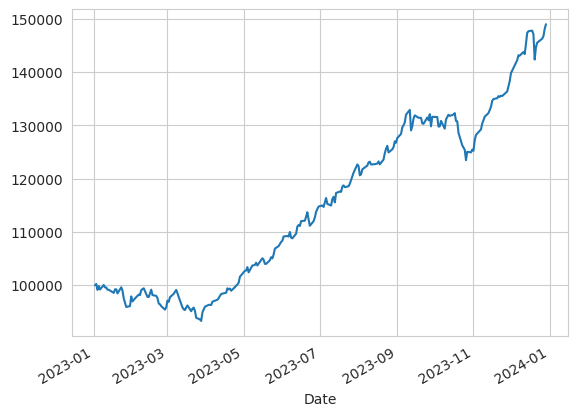

In [17]:
benchmarkdf['Portfolio Value'].plot(kind='line')

In [18]:
stocks =["LUPIN.NS", "VOLTAS.NS", "NMDC.NS", "ZYDUSLIFE.NS", "SAIL.NS"]

from itertools import combinations
numbers = range(len(stocks))

# Generate all combinations of selecting 3 numbers
combs = list(combinations(numbers, 3))  

In [19]:
combs

[(0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 2, 3),
 (0, 2, 4),
 (0, 3, 4),
 (1, 2, 3),
 (1, 2, 4),
 (1, 3, 4),
 (2, 3, 4)]

In [20]:

NUM_SIMULATIONS = 20000     # Tweak accordingly (can start with 5000-10000 for creating the code initially)
NUM_TRADING_DAYS = 252

In [21]:
start_date = '2023-01-01'
end_date = '2023-12-31'

In [53]:
NUM_SIMULATIONS = 20000     # Tweak accordingly (can start with 5000-10000 for creating the code initially)
NUM_TRADING_DAYS = 252

stocks =["LUPIN.NS", "VOLTAS.NS", "NMDC.NS", "ZYDUSLIFE.NS", "SAIL.NS"]

from itertools import combinations
numbers = range(len(stocks))

# Generate all combinations of selecting 3 numbers
combs = list(combinations(numbers, 3))              # it will be something like [(0,1,2), (0,1,3)....]
sharpes=[]
returns=[]
weightsmax=[]
for comb in combs:
    stocks_new = [stocks[i] for i in comb]
    stock_data = {}
    for stock in stocks_new:
        ticker = yf.Ticker(stock)
        stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']

    stock_prices = pd.DataFrame(stock_data)
        
    
    log_returns = np.log(stock_prices / stock_prices.shift(1))
    log_returns = log_returns[1:]
    
    log_returns = log_returns.dropna()        # Remove NaN values

    portfolio_weights = []
    portfolio_returns = []
    portfolio_risks = []

    for i in range(NUM_SIMULATIONS):
        w=np.random.random(3)
        portfolio_weights.append(w)
        port_return = np.sum(log_returns.mean()*w)*NUM_TRADING_DAYS
        portfolio_returns.append(port_return)
        port_risk = np.sqrt(np.dot(w.T,np.dot(log_returns.cov()*NUM_TRADING_DAYS,w)))
        portfolio_risks.append(port_risk)
    #your code here
    # 1) generate random weights
    # 2) update the list portfolio_weights
    # 3) update the list portfolio_returns
    # 4) update the list portfolio_risks
    #print(portfolio_weights)
    #print(portfolio_risks)
    #print(portfolio_returns)
    risk_free_rate = 0.07
    porfolio_weights = np.array(portfolio_weights)
    portfolio_returns = np.array(portfolio_returns)
    portfolio_risks = np.array(portfolio_risks)


    sharpe_ratios  = (portfolio_returns-risk_free_rate)/portfolio_risks # your code here

    portfolios = pd.DataFrame({"Return": portfolio_returns,"Risk": portfolio_risks,"Sharpe": sharpe_ratios })
    ind = 0

    for i in range(len(sharpe_ratios)):
        if(sharpe_ratios[i] == np.amax(sharpe_ratios)):
            ind = i

    weights = portfolio_weights[ind]
    weights=weights/(np.sum(weights))
    weightsmax.append(weights)

    num_shares=100000/(stock_prices[stocks_new[0]][0]*weights[0]+stock_prices[stocks_new[1]][0]*weights[1]+stock_prices[stocks_new[2]][0]*weights[2])
    
    df = stock_prices.copy()
    values=[]
    for i in range(len(stock_prices)):
        val=stock_prices[stocks_new[0]][i]*weights[0]*num_shares+stock_prices[stocks_new[2]][i]*weights[2]*num_shares+stock_prices[stocks_new[1]][i]*weights[1]*num_shares
        values.append(val)# create a column in df named "Portfolio Value" which is our portfolio value, if we buy the corresponding three stocks in the weights we just got on the first day
    df['Portfolio Value']=np.array(values)
  # Hint:
      # Calculate the shares bought for each on the first day.
      # use this calculated value and multiply with close of each day to get portfolio value on that stock on the day.
      # now add the individual stock portfolios to get the final portfolio value on the day.

    final_portfolio_value = df['Portfolio Value'][-1]

    df_returns = (final_portfolio_value - initial_investment)*100 / initial_investment
    returns.append(round(df_returns,2))
    print("Combo Returns:", round(df_returns,2),"%")
     
    df_sr = sharpe_ratios[ind]
    sharpes.append(df_sr)
    print("Combo Sharpe Ratio:", round(df_sr,2))
    print()



/tmp/ipykernel_33/2238571777.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_shares=100000/(stock_prices[stocks_new[0]][0]*weights[0]+stock_prices[stocks_new[1]][0]*weights[1]+stock_prices[stocks_new[2]][0]*weights[2])
/tmp/ipykernel_33/2238571777.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=stock_prices[stocks_new[0]][i]*weights[0]*num_shares+stock_prices[stocks_new[2]][i]*weights[2]*num_shares+stock_prices[stocks_new[1]][i]*weights[1]*num_shares
/tmp/ipykernel_33/2238571777.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

Combo Returns: 64.61 %
Combo Sharpe Ratio: 2.79



/tmp/ipykernel_33/2238571777.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_shares=100000/(stock_prices[stocks_new[0]][0]*weights[0]+stock_prices[stocks_new[1]][0]*weights[1]+stock_prices[stocks_new[2]][0]*weights[2])
/tmp/ipykernel_33/2238571777.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=stock_prices[stocks_new[0]][i]*weights[0]*num_shares+stock_prices[stocks_new[2]][i]*weights[2]*num_shares+stock_prices[stocks_new[1]][i]*weights[1]*num_shares
/tmp/ipykernel_33/2238571777.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

Combo Returns: 64.12 %
Combo Sharpe Ratio: 2.75



/tmp/ipykernel_33/2238571777.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_shares=100000/(stock_prices[stocks_new[0]][0]*weights[0]+stock_prices[stocks_new[1]][0]*weights[1]+stock_prices[stocks_new[2]][0]*weights[2])
/tmp/ipykernel_33/2238571777.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=stock_prices[stocks_new[0]][i]*weights[0]*num_shares+stock_prices[stocks_new[2]][i]*weights[2]*num_shares+stock_prices[stocks_new[1]][i]*weights[1]*num_shares
/tmp/ipykernel_33/2238571777.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

Combo Returns: 64.96 %
Combo Sharpe Ratio: 2.42



/tmp/ipykernel_33/2238571777.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_shares=100000/(stock_prices[stocks_new[0]][0]*weights[0]+stock_prices[stocks_new[1]][0]*weights[1]+stock_prices[stocks_new[2]][0]*weights[2])
/tmp/ipykernel_33/2238571777.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=stock_prices[stocks_new[0]][i]*weights[0]*num_shares+stock_prices[stocks_new[2]][i]*weights[2]*num_shares+stock_prices[stocks_new[1]][i]*weights[1]*num_shares
/tmp/ipykernel_33/2238571777.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

Combo Returns: 75.53 %
Combo Sharpe Ratio: 3.08



/tmp/ipykernel_33/2238571777.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_shares=100000/(stock_prices[stocks_new[0]][0]*weights[0]+stock_prices[stocks_new[1]][0]*weights[1]+stock_prices[stocks_new[2]][0]*weights[2])
/tmp/ipykernel_33/2238571777.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=stock_prices[stocks_new[0]][i]*weights[0]*num_shares+stock_prices[stocks_new[2]][i]*weights[2]*num_shares+stock_prices[stocks_new[1]][i]*weights[1]*num_shares
/tmp/ipykernel_33/2238571777.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

Combo Returns: 80.67 %
Combo Sharpe Ratio: 2.72



/tmp/ipykernel_33/2238571777.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_shares=100000/(stock_prices[stocks_new[0]][0]*weights[0]+stock_prices[stocks_new[1]][0]*weights[1]+stock_prices[stocks_new[2]][0]*weights[2])
/tmp/ipykernel_33/2238571777.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=stock_prices[stocks_new[0]][i]*weights[0]*num_shares+stock_prices[stocks_new[2]][i]*weights[2]*num_shares+stock_prices[stocks_new[1]][i]*weights[1]*num_shares
/tmp/ipykernel_33/2238571777.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

Combo Returns: 74.76 %
Combo Sharpe Ratio: 2.75



/tmp/ipykernel_33/2238571777.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_shares=100000/(stock_prices[stocks_new[0]][0]*weights[0]+stock_prices[stocks_new[1]][0]*weights[1]+stock_prices[stocks_new[2]][0]*weights[2])
/tmp/ipykernel_33/2238571777.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=stock_prices[stocks_new[0]][i]*weights[0]*num_shares+stock_prices[stocks_new[2]][i]*weights[2]*num_shares+stock_prices[stocks_new[1]][i]*weights[1]*num_shares
/tmp/ipykernel_33/2238571777.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

Combo Returns: 52.96 %
Combo Sharpe Ratio: 2.76



/tmp/ipykernel_33/2238571777.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_shares=100000/(stock_prices[stocks_new[0]][0]*weights[0]+stock_prices[stocks_new[1]][0]*weights[1]+stock_prices[stocks_new[2]][0]*weights[2])
/tmp/ipykernel_33/2238571777.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=stock_prices[stocks_new[0]][i]*weights[0]*num_shares+stock_prices[stocks_new[2]][i]*weights[2]*num_shares+stock_prices[stocks_new[1]][i]*weights[1]*num_shares
/tmp/ipykernel_33/2238571777.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

Combo Returns: 32.24 %
Combo Sharpe Ratio: 1.95



/tmp/ipykernel_33/2238571777.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_shares=100000/(stock_prices[stocks_new[0]][0]*weights[0]+stock_prices[stocks_new[1]][0]*weights[1]+stock_prices[stocks_new[2]][0]*weights[2])
/tmp/ipykernel_33/2238571777.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=stock_prices[stocks_new[0]][i]*weights[0]*num_shares+stock_prices[stocks_new[2]][i]*weights[2]*num_shares+stock_prices[stocks_new[1]][i]*weights[1]*num_shares
/tmp/ipykernel_33/2238571777.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

Combo Returns: 49.84 %
Combo Sharpe Ratio: 2.27

Combo Returns: 67.47 %
Combo Sharpe Ratio: 2.71



/tmp/ipykernel_33/2238571777.py:67: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  num_shares=100000/(stock_prices[stocks_new[0]][0]*weights[0]+stock_prices[stocks_new[1]][0]*weights[1]+stock_prices[stocks_new[2]][0]*weights[2])
/tmp/ipykernel_33/2238571777.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val=stock_prices[stocks_new[0]][i]*weights[0]*num_shares+stock_prices[stocks_new[2]][i]*weights[2]*num_shares+stock_prices[stocks_new[1]][i]*weights[1]*num_shares
/tmp/ipykernel_33/2238571777.py:80: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will 

In [23]:

portfolio_risks

array([0.12830756, 0.4895121 , 0.33517819, ..., 0.44100108, 0.27924288,
       0.39433097])

In [55]:
sharpes=np.array(sharpes)
returns=np.array(returns)

In [56]:
maxi=0
ret=0
ind=0
for i in range(len(sharpes)):
    if sharpes[i]>=2.77:
        maxi=max(returns[i],maxi)
    if maxi==returns[i]:
        ret=returns[i]
        ind=i
        

In [57]:
returns[ind]

75.53

In [58]:
combs[ind]

(0, 2, 3)

In [59]:
weightsmax[ind]


array([0.33506254, 0.32076969, 0.34416777])

In [60]:
sharpes[ind]

3.0843681778106915

array([2.78506374, 2.7465356 , 2.41530087, 3.08436818, 2.71606405,
       2.75063412, 2.76303127, 1.95284867, 2.27017665, 2.7105835 ])